In [61]:
!pip install prophet

In [62]:
!pip install tensorflow

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [64]:
df = pd.read_csv(r"C:\Users\ejanv\Desktop\Eskwelabs\Capstone\csv\consolidated_csv_01BURGOS_G01_1.csv")

In [65]:
# transform date column into a datetime column
df['RUN_TIME'] = pd.to_datetime(df['RUN_TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df = df.set_index('RUN_TIME')
df.head()

,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
RUN_TIME,,,,,,,,,,
NaT,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:05:00 AM,12/26/2022,12/26/2022 12:05:00 AM,EBWPC,98.0,NaN
2022-12-26 00:05:00,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:10:00 AM,12/26/2022 12:05:00 AM,12/26/2022 12:10:00 AM,EBWPC,97.0,NaN
2022-12-26 00:10:00,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:15:00 AM,12/26/2022 12:10:00 AM,12/26/2022 12:15:00 AM,EBWPC,96.0,NaN
2022-12-26 00:15:00,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:20:00 AM,12/26/2022 12:15:00 AM,12/26/2022 12:20:00 AM,EBWPC,112.0,NaN
2022-12-26 00:20:00,RTD,CLUZ,NLUZON,01BURGOS_G01,12/26/2022 12:25:00 AM,12/26/2022 12:20:00 AM,12/26/2022 12:25:00 AM,EBWPC,112.0,NaN


In [66]:
data = df[['SELF_SCHED_MW']]
data = data.asfreq(freq='D') # Add to complete dates
data

,SELF_SCHED_MW
RUN_TIME,
2022-12-26 00:05:00,97.0
2022-12-27 00:05:00,79.0
2022-12-28 00:05:00,85.0
2022-12-29 00:05:00,111.0
2022-12-30 00:05:00,130.0
...,...
2023-09-21 00:05:00,0.2
2023-09-22 00:05:00,11.1
2023-09-23 00:05:00,41.0


<Axes: xlabel='RUN_TIME'>

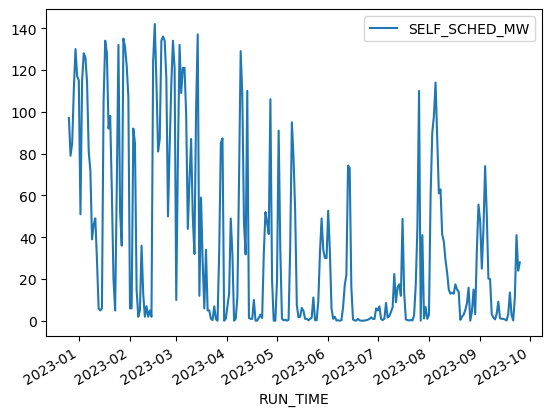

In [67]:
data['SELF_SCHED_MW'] = data['SELF_SCHED_MW'].fillna(method='ffill')
data[['SELF_SCHED_MW']].plot()

In [68]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

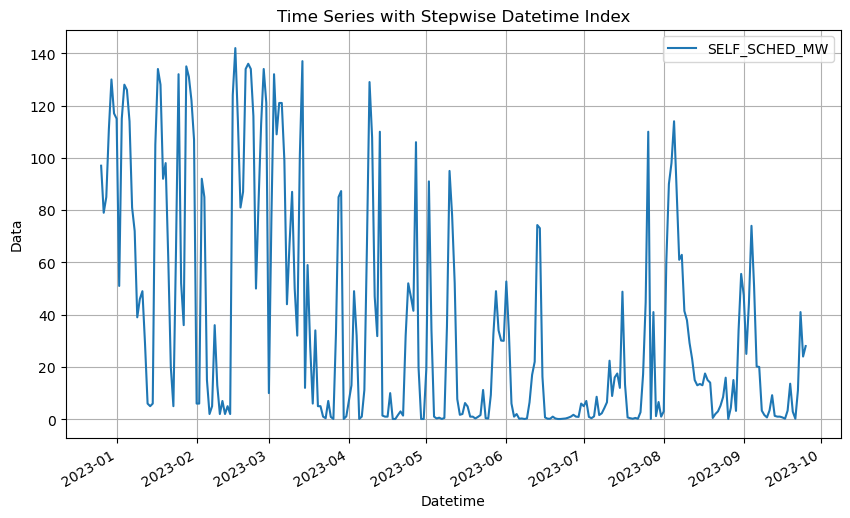

In [69]:
# Plot the time series while preserving the stepwise format
data.plot(figsize=(10, 6))
plt.title('Time Series with Stepwise Datetime Index')
plt.xlabel('Datetime')
plt.ylabel('Data')
plt.grid(True)
plt.show()

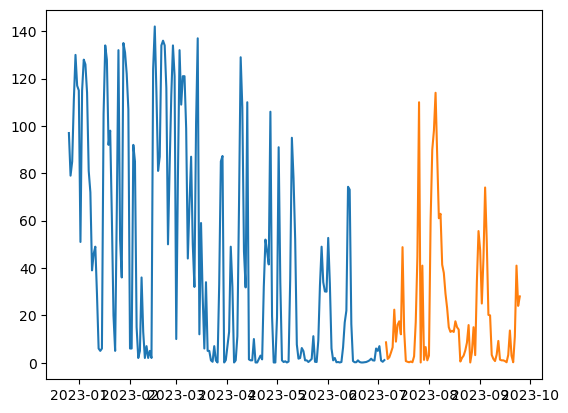

In [70]:
train_data = data[:round(len(data)*0.7)]
test_data = data[round(len(data)*0.7):]
plt.plot(train_data)
plt.plot(test_data)

In [71]:
train_data

,SELF_SCHED_MW
RUN_TIME,
2022-12-26 00:05:00,97.0
2022-12-27 00:05:00,79.0
2022-12-28 00:05:00,85.0
2022-12-29 00:05:00,111.0
2022-12-30 00:05:00,130.0
...,...
2023-07-01 00:05:00,5.0
2023-07-02 00:05:00,7.0
2023-07-03 00:05:00,0.9


In [72]:
test_data

,SELF_SCHED_MW
RUN_TIME,
2023-07-06 00:05:00,8.6
2023-07-07 00:05:00,1.6
2023-07-08 00:05:00,2.3
2023-07-09 00:05:00,4.3
2023-07-10 00:05:00,6.5
...,...
2023-09-21 00:05:00,0.2
2023-09-22 00:05:00,11.1
2023-09-23 00:05:00,41.0


## Trial Prophet

In [73]:
train_data.reset_index(inplace=True)
train_data = train_data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})
train_data

,ds,y
0,2022-12-26 00:05:00,97.0
1,2022-12-27 00:05:00,79.0
2,2022-12-28 00:05:00,85.0
3,2022-12-29 00:05:00,111.0
4,2022-12-30 00:05:00,130.0
...,...,...
187,2023-07-01 00:05:00,5.0
188,2023-07-02 00:05:00,7.0
189,2023-07-03 00:05:00,0.9
190,2023-07-04 00:05:00,0.4


In [74]:
test_data.reset_index(inplace=True)
test_data = test_data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})
test_data

,ds,y
0,2023-07-06 00:05:00,8.6
1,2023-07-07 00:05:00,1.6
2,2023-07-08 00:05:00,2.3
3,2023-07-09 00:05:00,4.3
4,2023-07-10 00:05:00,6.5
...,...,...
77,2023-09-21 00:05:00,0.2
78,2023-09-22 00:05:00,11.1
79,2023-09-23 00:05:00,41.0
80,2023-09-24 00:05:00,24.0


In [75]:
from prophet import Prophet

model = Prophet()
model.fit(train_data[['ds', 'y']])

17:42:25 - cmdstanpy - INFO - Chain [1] start processing
17:42:25 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
future_dates = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future_dates)

In [77]:
y_true = test_data['y'].values
y_pred = forecast[-len(test_data):]['yhat'].values

In [78]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def show_errors(y_true, y_pred):
    return pd.DataFrame({'RMSE': root_mean_squared_error(y_true, y_pred),
                         'MAE': mean_absolute_error(y_true, y_pred),
                         'MAPE': mean_absolute_percentage_error(y_true, y_pred)}, index=[0])

In [79]:
errors = show_errors(y_true, y_pred)
print(errors)

        RMSE        MAE         MAPE
0  55.847689  47.722015  2207.589413


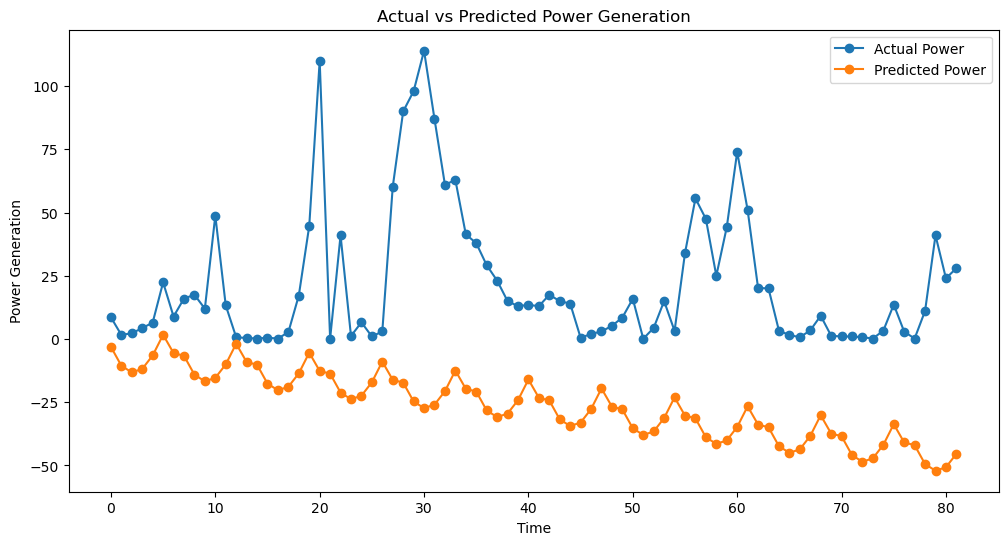

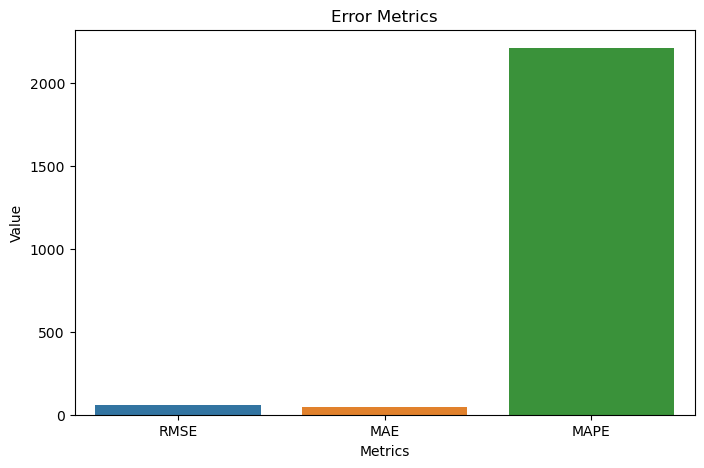

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual Power', marker='o')
    plt.plot(y_pred, label='Predicted Power', marker='o')
    plt.title('Actual vs Predicted Power Generation')
    plt.xlabel('Time')
    plt.ylabel('Power Generation')
    plt.legend()
    plt.show()

# Function to plot error metrics
def plot_error_metrics(errors):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=errors.columns, y=errors.values[0])
    plt.title('Error Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Value')
    plt.show()

# Assuming you've already calculated errors and have y_true, y_pred
plot_actual_vs_predicted(y_true, y_pred)
plot_error_metrics(errors)


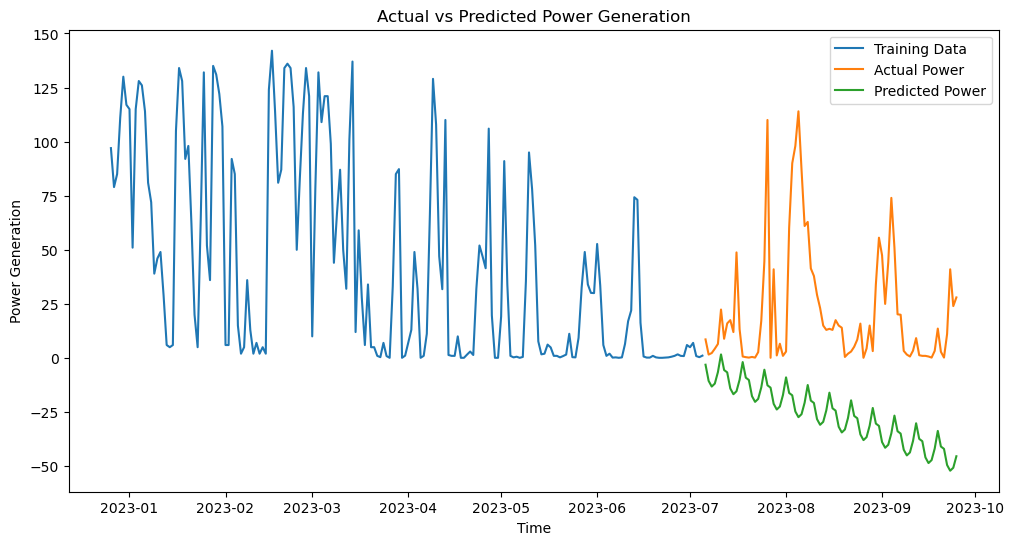

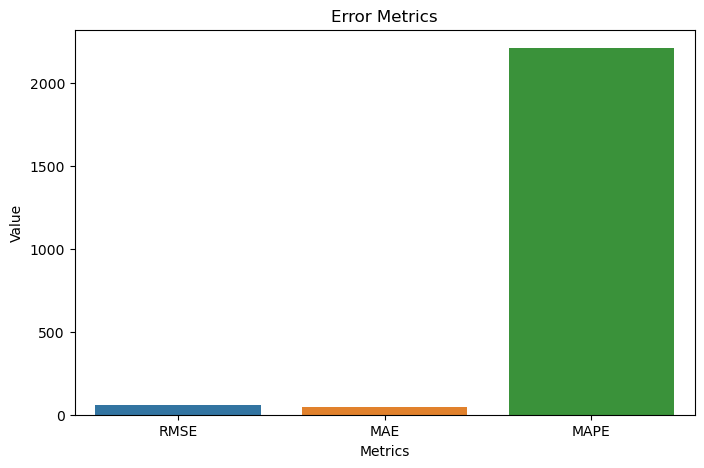

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(train_data, test_data, y_pred):
    plt.figure(figsize=(12, 6))
    
    # Plot training data
    plt.plot(train_data['ds'], train_data['y'], label='Training Data')

    # Plot actual and predicted values for the test set
    plt.plot(test_data['ds'], test_data['y'], label='Actual Power')
    plt.plot(test_data['ds'], y_pred, label='Predicted Power')

    plt.title('Actual vs Predicted Power Generation')
    plt.xlabel('Time')
    plt.ylabel('Power Generation')
    plt.legend()
    plt.show()

# Function to plot error metrics
def plot_error_metrics(errors):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=errors.columns, y=errors.values[0])
    plt.title('Error Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Value')
    plt.show()

# Assuming you've already calculated errors and have train_df, test_df, and y_pred
plot_actual_vs_predicted(train_data, test_data, y_pred)
plot_error_metrics(errors)


## LSTM trial

In [82]:
data1 = data.values.reshape(-1,1)
data1

array([[9.700e+01],
       [7.900e+01],
       [8.500e+01],
       [1.110e+02],
       [1.300e+02],
       [1.170e+02],
       [1.150e+02],
       [5.100e+01],
       [1.150e+02],
       [1.280e+02],
       [1.260e+02],
       [1.140e+02],
       [8.100e+01],
       [7.200e+01],
       [3.900e+01],
       [4.600e+01],
       [4.900e+01],
       [2.900e+01],
       [6.000e+00],
       [5.000e+00],
       [6.000e+00],
       [1.050e+02],
       [1.340e+02],
       [1.280e+02],
       [9.200e+01],
       [9.800e+01],
       [6.200e+01],
       [2.000e+01],
       [5.000e+00],
       [6.400e+01],
       [1.320e+02],
       [5.200e+01],
       [3.600e+01],
       [1.350e+02],
       [1.310e+02],
       [1.220e+02],
       [1.070e+02],
       [6.000e+00],
       [6.000e+00],
       [9.200e+01],
       [8.500e+01],
       [1.500e+01],
       [2.000e+00],
       [5.000e+00],
       [3.600e+01],
       [1.300e+01],
       [2.000e+00],
       [7.000e+00],
       [2.000e+00],
       [5.000e+00],


In [83]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data1)
data_scaled

array([[6.82875264e-01],
       [5.56025370e-01],
       [5.98308668e-01],
       [7.81536293e-01],
       [9.15433404e-01],
       [8.23819591e-01],
       [8.09725159e-01],
       [3.58703312e-01],
       [8.09725159e-01],
       [9.01338971e-01],
       [8.87244538e-01],
       [8.02677942e-01],
       [5.70119803e-01],
       [5.06694856e-01],
       [2.74136716e-01],
       [3.23467230e-01],
       [3.44608879e-01],
       [2.03664553e-01],
       [4.15785765e-02],
       [3.45313601e-02],
       [4.15785765e-02],
       [7.39252995e-01],
       [9.43622269e-01],
       [9.01338971e-01],
       [6.47639183e-01],
       [6.89922481e-01],
       [4.36222692e-01],
       [1.40239605e-01],
       [3.45313601e-02],
       [4.50317125e-01],
       [9.29527837e-01],
       [3.65750529e-01],
       [2.52995067e-01],
       [9.50669486e-01],
       [9.22480620e-01],
       [8.59055673e-01],
       [7.53347428e-01],
       [4.15785765e-02],
       [4.15785765e-02],
       [6.47639183e-01],


In [84]:
def create_sequences(data1, sequence_length):
    sequences = []
    for i in range(len(data1) - sequence_length):
        sequence = data1[i:i+sequence_length]
        target = data1[i+sequence_length]
        sequences.append((sequence, target))
    return sequences

sequence_length = 10  # You can adjust this based on your preference
sequences = create_sequences(data_scaled, sequence_length)

# Convert the sequences to NumPy arrays
X, y = zip(*sequences)
X, y = np.array(X), np.array(y)

In [85]:
split = int(0.7 * len(sequences))  # 70% for training, 30% for testing

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
6/6 [==============================] - 9s 5ms/step - loss: 0.1461
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1156
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0904
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0797
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0796
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0770
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0752
Epoch 8/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0749
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0745
Epoch 10/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0737
Epoch 11/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0732
Epoch 12/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0728
Epoch 13/50
6/6 [==============================] - 0s 11ms/step - loss:

In [87]:
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_original_scale = scaler.inverse_transform(predictions)


3/3 [==============================] - 0s 4ms/step


In [88]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.1620667048548066


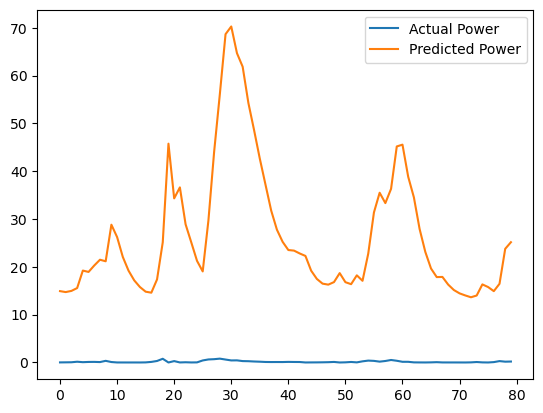

In [89]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual Power')
plt.plot(predictions_original_scale, label='Predicted Power')
plt.legend()
plt.show()


In [90]:
y_test

array([[1.55038760e-02],
       [2.95983087e-02],
       [4.51021846e-02],
       [1.57152925e-01],
       [6.20155039e-02],
       [1.12050740e-01],
       [1.22621564e-01],
       [8.38618746e-02],
       [3.43199436e-01],
       [9.30232558e-02],
       [4.22832981e-03],
       [2.11416490e-03],
       [7.04721635e-04],
       [2.81888654e-03],
       [7.04721635e-04],
       [1.83227625e-02],
       [1.20507400e-01],
       [3.14305849e-01],
       [7.74489077e-01],
       [0.00000000e+00],
       [2.88231149e-01],
       [7.75193798e-03],
       [4.58069063e-02],
       [6.34249471e-03],
       [2.04369274e-02],
       [4.23537703e-01],
       [6.33544750e-01],
       [6.89922481e-01],
       [8.02677942e-01],
       [6.12403101e-01],
       [4.29175476e-01],
       [4.42565187e-01],
       [2.91050035e-01],
       [2.66384778e-01],
       [2.05073996e-01],
       [1.62085976e-01],
       [1.05003524e-01],
       [9.09090909e-02],
       [9.44326991e-02],
       [9.09090909e-02],


# Prophet

In [91]:
data.reset_index(inplace=True)
data = data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})
data

,ds,y
0,2022-12-26 00:05:00,97.0
1,2022-12-27 00:05:00,79.0
2,2022-12-28 00:05:00,85.0
3,2022-12-29 00:05:00,111.0
4,2022-12-30 00:05:00,130.0
...,...,...
269,2023-09-21 00:05:00,0.2
270,2023-09-22 00:05:00,11.1
271,2023-09-23 00:05:00,41.0
272,2023-09-24 00:05:00,24.0


In [92]:
from prophet import Prophet

# Initialize the model
model1 = Prophet()

# Fit the model to your data
model1.fit(data)

17:42:44 - cmdstanpy - INFO - Chain [1] start processing
17:42:44 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
future_dates1 = model1.make_future_dataframe(periods=30)
future_dates1.tail()

,ds
299,2023-10-21 00:05:00
300,2023-10-22 00:05:00
301,2023-10-23 00:05:00
302,2023-10-24 00:05:00
303,2023-10-25 00:05:00


In [94]:
forecast1 = model1.predict(future_dates1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
299,2023-10-21 00:05:00,-9.666697,-57.107615,40.336741
300,2023-10-22 00:05:00,-8.448482,-57.741322,43.095696
301,2023-10-23 00:05:00,-3.733081,-51.727488,43.259545
302,2023-10-24 00:05:00,2.705992,-44.307275,54.123853
303,2023-10-25 00:05:00,-1.199921,-46.325704,43.666801


In [95]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-26 00:05:00,73.721714,23.467990,122.893934,73.721714,73.721714,0.527294,0.527294,0.527294,0.527294,0.527294,0.527294,0.0,0.0,0.0,74.249008
1,2022-12-27 00:05:00,73.438445,33.936578,129.566167,73.438445,73.438445,7.204917,7.204917,7.204917,7.204917,7.204917,7.204917,0.0,0.0,0.0,80.643362
2,2022-12-28 00:05:00,73.155176,29.736092,126.644156,73.155176,73.155176,3.537553,3.537553,3.537553,3.537553,3.537553,3.537553,0.0,0.0,0.0,76.692728
3,2022-12-29 00:05:00,72.871906,24.944458,124.011325,72.871906,72.871906,1.957869,1.957869,1.957869,1.957869,1.957869,1.957869,0.0,0.0,0.0,74.829775
4,2022-12-30 00:05:00,72.588637,21.203035,115.795725,72.588637,72.588637,-2.917557,-2.917557,-2.917557,-2.917557,-2.917557,-2.917557,0.0,0.0,0.0,69.671080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2023-10-21 00:05:00,-3.783278,-57.107615,40.336741,-3.846808,-3.714060,-5.883419,-5.883419,-5.883419,-5.883419,-5.883419,-5.883419,0.0,0.0,0.0,-9.666697
300,2023-10-22 00:05:00,-4.021827,-57.741322,43.095696,-4.089245,-3.948891,-4.426655,-4.426655,-4.426655,-4.426655,-4.426655,-4.426655,0.0,0.0,0.0,-8.448482
301,2023-10-23 00:05:00,-4.260376,-51.727488,43.259545,-4.331462,-4.182728,0.527294,0.527294,0.527294,0.527294,0.527294,0.527294,0.0,0.0,0.0,-3.733081
302,2023-10-24 00:05:00,-4.498924,-44.307275,54.123853,-4.574673,-4.415712,7.204917,7.204917,7.204917,7.204917,7.204917,7.204917,0.0,0.0,0.0,2.705992


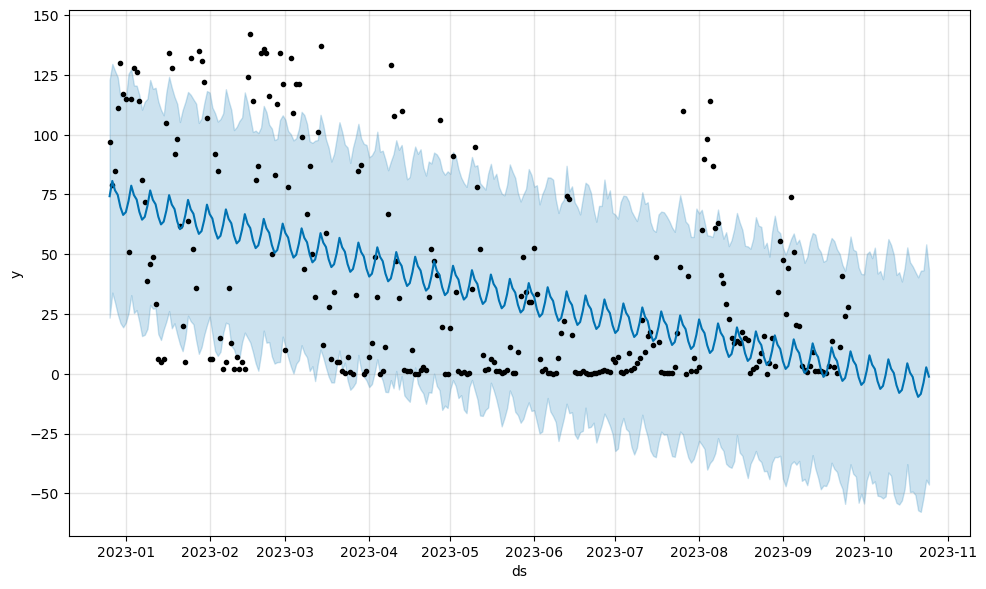

In [96]:
fig1 = model1.plot(forecast1)


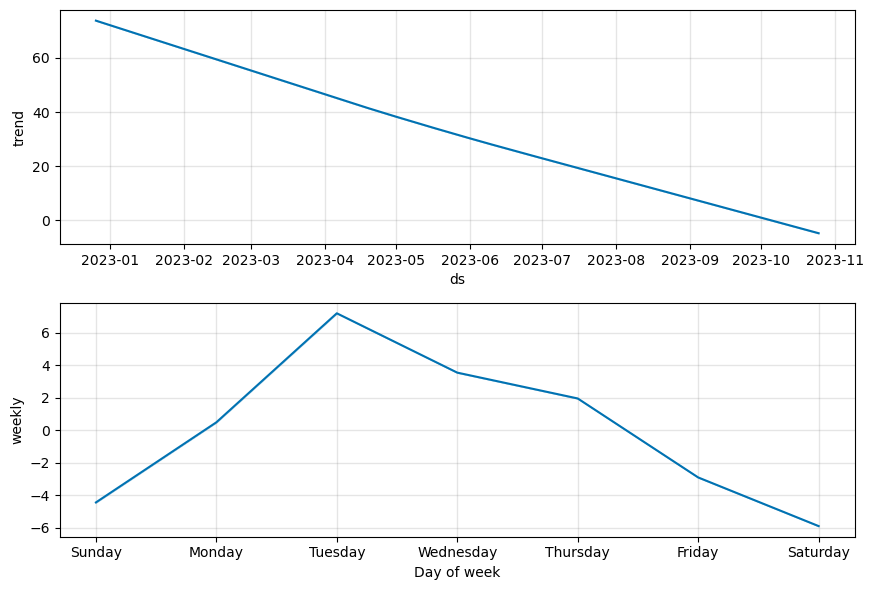

In [97]:
fig_components1 = model1.plot_components(forecast1)


## Plotly Prophet

### Super long and usually lags if noob laptop

In [98]:
# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(model, forecast)

## Prophet with metrics 

In [99]:
# train_data.reset_index(inplace=True)
# train_data = train_data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})

In [100]:
# test_data.reset_index(inplace=True)
# test_data = test_data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})

In [101]:
# train_data

In [102]:
# model1 = Prophet()
# model1.fit(train_data)

In [103]:
# future_dates_train = model1.make_future_dataframe(periods=30)
# future_dates_train.tail()

In [104]:
# forecast1 = model1.predict(future_dates_train)
# forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [105]:
# fig_test = model1.plot(forecast1)


In [106]:
# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def root_mean_squared_error(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def show_errors(y_true, y_pred):
#     return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
#                                             'MAE':mean_absolute_error(y_true,y_pred),\
#                                             'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

In [107]:
# show_errors(test_data['y'], forecast1['yhat'])

In [108]:
# from sklearn.metrics import r2_score

# r2_score(test_data['y'], forecast1['yhat'])

# This part is the reference to Auto ARIMA model

In [109]:
# charts_df[charts_df.index.duplicated()]

In [110]:
# charts_df = charts_df[~charts_df.index.duplicated()]

In [111]:
# data = charts_df[['SELF_SCHED_MW']]
# data = data.asfreq(freq='5T') # Add to complete dates
# data

In [112]:
# data['SELF_SCHED_MW'] = data['SELF_SCHED_MW'].fillna(method='ffill')
# data[['SELF_SCHED_MW']].plot()

In [113]:
# from pmdarima.arima import ADFTest
# adf_test = ADFTest(alpha = 0.05)
# adf_test.should_diff(data)

In [114]:
# train_data = data[:round(len(data)*0.7)]
# test_data = data[round(len(data)*0.7):]
# plt.plot(train_data)
# plt.plot(test_data)

In [115]:
# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def root_mean_squared_error(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def show_errors(y_true, y_pred):
#     return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
#                                             'MAE':mean_absolute_error(y_true,y_pred),\
#                                             'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

In [116]:
# arima_model = auto_arima(train_data, start_p=0, d=1, start_q=0,
#                          max_p=7, max_d=2,max_q=7, start_P=0,
#                          D=1, start_Q=0, max_P=7, max_D=2, max_Q=7, m=12, seasonal=True,
#                          error_action='warn', trace=True,
#                          supress_warnings=True, stepwise=True,
#                          random_state=20, n_fits=50)

In [117]:
# arima_model.summary()

In [118]:
# prediction = pd.DataFrame(arima_model.predict(n_periods=700),index=test_data.index)
# prediction.columns = ['predicted_streams']
# prediction

In [119]:
# plt.figure(figsize=(8,5))
# # plt.plot(train_data, label="Training")
# # plt.plot(test_data, label="Test")
# plt.plot(train_data)
# plt.plot(prediction, label="Predicted")
# plt.legend()
# plt.show()

In [120]:
# plt.figure(figsize=(8,5))
# plt.plot(train_data, label="Training")
# plt.plot(test_data, label="Test")
# plt.plot(prediction, label="Predicted")
# plt.legend()
# plt.show()

In [121]:
# test_data

In [122]:
# show_errors(test_data['MAX_QUANTITY'], prediction['predicted_streams'])

In [123]:
# from sklearn.metrics import r2_score

# r2_score(test_data['MAX_QUANTITY'], prediction['predicted_streams'])

In [124]:
# forecast = arima_model.fit_predict(data, n_periods=90)

In [125]:
# plt.plot(forecast)

In [126]:
# plt.figure(figsize=(8,5))
# plt.plot(train_data, label="Training")
# plt.plot(test_data, label="Test")
# plt.plot(prediction, label="Predicted")
# plt.plot(forecast, label="Forecasted")
# plt.legend()
# plt.show()

In [127]:
# joblib.dump(arima_model, 'arima.pkl')

In [128]:
# history = [x for x in X]
# day = 1
# for yhat in forecast:
#  inverted = inverse_difference(history, yhat, days_in_year)
#  print('Day %d: %f' % (day, inverted))
#  history.append(inverted)
#  day += 1

In [129]:
# model = arima_model  # seeded from the model we've already fit

# def forecast_one_step():
#     fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
#     return (
#         fc.tolist()[0],
#         np.asarray(conf_int).tolist()[0])

# forecasts = []
# confidence_intervals = []

# for new_ob in test_data:
#     fc, conf = forecast_one_step()
#     forecasts.append(fc)
#     confidence_intervals.append(conf)

#     # Updates the existing model with a small number of MLE steps
#     model.update(new_ob)

# print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")


In [130]:
# fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# # --------------------- Actual vs. Predicted --------------------------
# axes[0].plot(y_train, color='blue', label='Training Data')
# axes[0].plot(test_data.index, forecasts, color='green', marker='o',
#              label='Predicted Price')

# axes[0].plot(test_data.index, y_test, color='red', label='Actual Price')
# axes[0].set_title('Microsoft Prices Prediction')
# axes[0].set_xlabel('Dates')
# axes[0].set_ylabel('Prices')

# axes[0].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
# axes[0].legend()


# # ------------------ Predicted with confidence intervals ----------------
# axes[1].plot(y_train, color='blue', label='Training Data')
# axes[1].plot(test_data.index, forecasts, color='green',
#              label='Predicted Price')

# axes[1].set_title('Prices Predictions & Confidence Intervals')
# axes[1].set_xlabel('Dates')
# axes[1].set_ylabel('Prices')

# conf_int = np.asarray(confidence_intervals)
# axes[1].fill_between(test_data.index,
#                      conf_int[:, 0], conf_int[:, 1],
#                      alpha=0.9, color='orange',
#                      label="Confidence Intervals")

# axes[1].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
# axes[1].legend()

In [131]:
# N = test_data.shape[0]
# forecasts = arima_model.predict(N)
# in_sample_forecast = arima_model.predict_in_sample()

In [132]:
# model_fit = auto_arima(data, start_p=0, d=1, start_q=0,
#                          max_p=5, max_d=2,max_q=5, start_P=0,
#                          D=1, start_Q=0, max_P=5, max_D=2, max_Q=5, m=12, seasonal=True,
#                          error_action='warn', trace=True,
#                          supress_warnings=True, stepwise=True,
#                          random_state=20, n_fits=50)

In [133]:
# prediction2 = pd.DataFrame(model_fit.predict(n_periods=100),index=data.index)
# prediction2.columns = ['predicted_streams']
# prediction2

In [134]:
# plt.figure(figsize=(8,5))
# plt.plot(train_data, label="Training")
# plt.plot(test_data, label="Test")
# plt.plot(prediction, label="Predicted")
# plt.legend()
# plt.show()

In [135]:
# from sklearn.metrics import r2_score

# r2_score(data['streams'], prediction2['predicted_streams'])

In [136]:
# joblib.dump(arima_model, 'arima.pkl')

In [137]:
# from pmdarima.arima import auto_arima
# from pmdarima.datasets import load_lynx
# import numpy as np

# # For serialization:
# import joblib
# import pickle

# # Load data and fit a model
# y = load_lynx()
# arima = auto_arima(y, seasonal=True)

# # Serialize with Pickle
# with open('arima.pkl', 'wb') as pkl:
#     pickle.dump(arima, pkl)

# # You can still make predictions from the model at this point
# arima.predict(n_periods=5)

# # Now read it back and make a prediction
# with open('arima.pkl', 'rb') as pkl:
#     pickle_preds = pickle.load(pkl).predict(n_periods=5)

# # Or maybe joblib tickles your fancy
# joblib.dump(arima, 'arima.pkl')
# joblib_preds = joblib.load('arima.pkl').predict(n_periods=5)

# # show they're the same
# np.allclose(pickle_preds, joblib_preds)